# Prerequisites

For this demo we really just need to import `andata`, but the other two will probably come in handy during your analyses):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ch_util.andata import HKPData

/Users/davor/anaconda3/envs/ch_util/lib/python2.7/site-packages/caput/mpiutil.py:77: UserWarning: Warning: mpi4py not installed.
  warnings.warn("Warning: mpi4py not installed.")


# Loading the data
Most of the functionality in `HKPData` currently is just loading the data file and converting it to a Pandas `DataFrame`. You do this by first opening the file with `from_acq_h5` (narrowing it to just the metrics of interest will spead-up your loading time substantially), and then `select`ing the metric by name:

In [15]:
f = HKPData.from_acq_h5('/Users/davor/projects/ch_prometheus/archiving/test_data/hkp_prom_20180122.h5', metrics=['ext_sensor_value'])

m = f.select('ext_sensor_value')
m.head()

,connector,device,hut,index,instance,job,origin,type,unit,value
time,,,,,,,,,,
2018-01-22 00:00:28.349999872,-,4A000007C1EFC628,w-rh,16,fla-enviromux11,fla,hk-east,temperature,-,170.0
2018-01-22 00:00:28.349999872,-,6F00000999414428,w-rh,13,fla-enviromux11,fla,hk-east,temperature,-,158.0
2018-01-22 00:00:28.349999872,-,2E000007C189D028,w-rh,1,fla-enviromux11,fla,hk-east,temperature,-,179.0
2018-01-22 00:00:28.349999872,-,7700000998CF7A28,w-rh,15,fla-enviromux11,fla,hk-east,temperature,-,161.0
2018-01-22 00:00:28.349999872,-,D60000099685A528,w-rh,20,fla-enviromux11,fla,hk-east,temperature,-,158.0


You can't assume a metric name doesn't appear in multiple jobs. All of them get merged into a single dataset, as you can see from the "job" label:

In [18]:
m.job.unique()

[fla, environment_sensors]
Categories (2, object): [fla, environment_sensors]

This also means that you have to be careful about plotting samples from a metric, as multiple jobs probably mean that they are measuring different things. So one of the things you'll always want to do is filter the metric by job of interest with `query`:

In [5]:
flas = m.query('job=="fla"')
flas.head()

,connector,device,hut,index,instance,job,origin,type,unit,value
time,,,,,,,,,,
2018-01-22 00:00:28.349999872,-,4A000007C1EFC628,w-rh,16,fla-enviromux11,fla,hk-east,temperature,-,170.0
2018-01-22 00:00:28.349999872,-,6F00000999414428,w-rh,13,fla-enviromux11,fla,hk-east,temperature,-,158.0
2018-01-22 00:00:28.349999872,-,2E000007C189D028,w-rh,1,fla-enviromux11,fla,hk-east,temperature,-,179.0
2018-01-22 00:00:28.349999872,-,7700000998CF7A28,w-rh,15,fla-enviromux11,fla,hk-east,temperature,-,161.0
2018-01-22 00:00:28.349999872,-,D60000099685A528,w-rh,20,fla-enviromux11,fla,hk-east,temperature,-,158.0


At this point, we could further filter by the location of interest. E.g., the `hut` label would select FLA temperatures for an entire hut. To view just a quadrant of a bulkhead, which is each allocated a separate Enviromux-1W unit, we'll filter by `instance`:

In [19]:
f7 = flas.query('instance=="fla-enviromux7"')
f7.head()

,connector,device,hut,index,instance,job,origin,type,unit,value
time,,,,,,,,,,
2018-01-22 00:00:38.369999872,-,3D00000923C60528,e-rh,5,fla-enviromux7,fla,hk-east,temperature,-,278.0
2018-01-22 00:00:38.369999872,-,C8000007C1893A28,e-rh,4,fla-enviromux7,fla,hk-east,temperature,-,272.0
2018-01-22 00:00:38.369999872,-,66000009243A9028,e-rh,10,fla-enviromux7,fla,hk-east,temperature,-,310.0
2018-01-22 00:00:38.369999872,-,0400000925742828,e-rh,12,fla-enviromux7,fla,hk-east,temperature,-,276.0
2018-01-22 00:00:38.369999872,-,47000009254AF028,e-rh,11,fla-enviromux7,fla,hk-east,temperature,-,257.0


Since we want to plot a line for each FLA's time series, we first group the data by the `device` label:

In [8]:
fs = f7.groupby('device')

The following bit is annoying, but a consequence of having the `device` "category" (in the Pandas sense) still include values which have been filtered out, and have groups of size zero that would cause an error to plot, we'll first get the set of device IDs that are actually connected to `fla-enviromux7` (there is almost certainly a more Pandas-ic way to do it, let us know if you know it):

In [9]:
fs_devices = [k for k,v in fs.groups.items() if len(v) > 0]
fs_devices

['66000009243A9028',
 '960000092520FC28',
 'E3000007C2504328',
 '1D000009256C3828',
 'EE00000924BA5428',
 '47000009254AF028',
 '3D00000923C60528',
 '7100000924C7B528',
 'C8000007C1893A28',
 'F0000009243FE428',
 '0400000925742828',
 '5C00000925636828',
 '56000009240CF528',
 '1700000925137428',
 '810000092445EC28',
 '9200000924B55A28',
 'CE00000924055428',
 '060000092561CF28',
 'E4000009240CF328',
 'E900000925248728',
 '1D0000092545E228']

Now we just do the usual Matplotlib plotting. The time indices are available in the `index` property (not really a column in the data, from Pandas's viewpoint), while the value is in the `value` column:

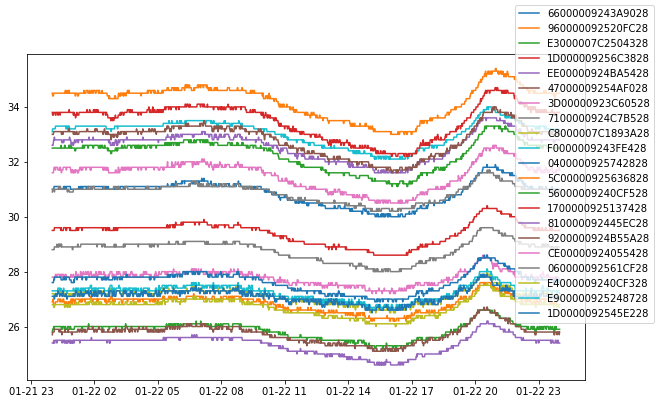

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for d in fs_devices:
    z = fs.get_group(d)
    ax.plot(z.index, z.value/10, label=d)
fig.legend()